### **Telecom Users Prediction**

Any business wants to maximize the number of customers. To achieve this goal, it is important not only to try to attract new ones, but also to retain existing ones. Retaining a client will cost the company less than attracting a new one. In addition, a new client may be weakly interested in business services and it will be difficult to work with him, while old clients already have the necessary data on interaction with the service.

Accordingly, predicting the churn, we can react in time and try to keep the client who wants to leave. Based on the data about the services that the client uses, we can make him a special offer, trying to change his decision to leave the operator. This will make the task of retention easier to implement than the task of attracting new users, about which we do not know anything yet.

You are provided with a dataset from a telecommunications company. The data contains information about almost six thousand users, their demographic characteristics, the services they use, the duration of using the operator's services, the method of payment, and the amount of payment.

**The task is to analyze the data and predict the churn of users (to identify people who will and will not renew their contract).**

The work should include the following mandatory items:

    
    -Description of the data (with the calculation of basic statistics);
    
    -Research of dependencies and formulation of hypotheses;
    
    -Building models for predicting the outflow (with justification for the choice of a particular model) based on tested hypotheses and identified relationships;
    
    -Comparison of the quality of the obtained models.
    
    
 **Data Dictionary**
 
customerID - customer id

gender - client gender (male / female)

SeniorCitizen - is the client retired (1, 0)

Partner - is the client married (Yes, No)

tenure - how many months a person has been a client of the company

PhoneService - is the telephone service connected (Yes, No)

MultipleLines - are multiple phone lines connected (Yes, No, No phone service)

InternetService - client's Internet service provider (DSL, Fiber optic, No)

OnlineSecurity - is the online security service connected (Yes, No, No internet service)

OnlineBackup - is the online backup service activated (Yes, No, No internet service)

DeviceProtection - does the client have equipment insurance (Yes, No, No internet service)

TechSupport - is the technical support service connected (Yes, No, No internet service)

StreamingTV - is the streaming TV service connected (Yes, No, No internet service)

StreamingMovies - is the streaming cinema service activated (Yes, No, No internet service)


Contract - type of customer contract (Month-to-month, One year, Two year)

PaperlessBilling - whether the client uses paperless billing (Yes, No)

PaymentMethod - payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

MonthlyCharges - current monthly payment

TotalCharges - the total amount that the client paid for the services for the entire time

Churn - whether there was a churn (Yes or No)

#### **1. Data Analysis and Insights from Data**

In [650]:
#importing libraries
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import joblib
plt.style.use('ggplot')
sns.set(style="whitegrid")
warnings.filterwarnings('ignore')

In [651]:
#reading data
telecom = pd.read_csv('C:\\Users\\Asus\\Desktop\\telecom\\data\\telecom_users.csv')
telecom.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


#### **Data Augmentation and Cleaning**

In [652]:
#Data Sctucture check
def data_check(df):
    print('dataframe shape:', df.shape)
    print()
    print(df.describe())
    print()
    print('Dataframe "NaN" values:',sum(df.isna().sum()))
    print()
    print(telecom.info())
    

#Predicted Label Change
def checkFunc(value):
    if value == True:
        return 'Corrrectly Predicted'
    else:
        return 'Not Correctly Predicted'

In [653]:
#Calling data check function
data_check(telecom)

dataframe shape: (5986, 22)

        Unnamed: 0  SeniorCitizen       tenure  MonthlyCharges
count  5986.000000    5986.000000  5986.000000     5986.000000
mean   3533.561310       0.161377    32.468760       64.802213
std    2035.705666       0.367909    24.516391       30.114702
min       0.000000       0.000000     0.000000       18.250000
25%    1777.250000       0.000000     9.000000       35.650000
50%    3546.500000       0.000000    29.000000       70.400000
75%    5291.750000       0.000000    56.000000       89.900000
max    7042.000000       1.000000    72.000000      118.750000

Dataframe "NaN" values: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
Unnamed: 0          5986 non-null int64
customerID          5986 non-null object
gender              5986 non-null object
SeniorCitizen       5986 non-null int64
Partner             5986 non-null object
Dependents          5986 non-null object
tenure              5986 

Monthly charges are in string dtype, let´s change it to numeric values

#### **1.1 Data Wrangling**

In [654]:
#Transforming Total charges column into integer
telecom['TotalCharges'] = telecom['TotalCharges'].convert_objects(convert_numeric=True)

#Replacing Empty values with mean
telecom.fillna(telecom.mean(),inplace=True)

In [655]:
telecom.describe()

,Unnamed: 0,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000
mean,3533.561310,0.161377,32.468760,64.802213,2298.060617
std,2035.705666,0.367909,24.516391,30.114702,2272.226516
min,0.000000,0.000000,0.000000,18.250000,18.800000
25%,1777.250000,0.000000,9.000000,35.650000,406.275000
50%,3546.500000,0.000000,29.000000,70.400000,1414.550000
75%,5291.750000,0.000000,56.000000,89.900000,3841.500000
max,7042.000000,1.000000,72.000000,118.750000,8684.800000


In [656]:
# a summay of categorical variables
telecom.describe(include=[np.object])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986
unique,5986,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7319-VENRZ,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3050,3082,4195,5396,2848,2627,2982,2605,2640,2960,2389,2356,3269,3528,2006,4399


#### **Data Insights from statistical reviews until this moment**

**-** the average number of months of customer subscription is 32 months.

**-** The average number of monthly charges for all customers is 64.80$

**-** The average of the total amount that the client paid for the services for the entire time is 2298.06$

**-** apparently there are not married customers.

**-** 90.14% of customers have Phone service(almost all).

**-** 47.58% of customers have fiber optic.

**-** 49.82% of customers don´t have online security (1/2 of customers).

**-** 43.52% of customers  don´t have online backup.

**-** 44.1% of  customers don´t have device protection.

**-** 49.45% of customers dont´t have tech support service(1/2 of customers).

**-** 39.91% of customers don´t have streaming tv service

**-** 39.36% of customers don´t have streaming cinema service.

**-** 58.94% of customers have "Paperless Billing"

**-** 33.51% of customers have electronic check (1/3 of customers).

In [657]:
#Creating a new dataframe to work on
data = telecom
data = data.drop(columns=['Unnamed: 0','customerID'])

#### **1.2 Data Visualization**

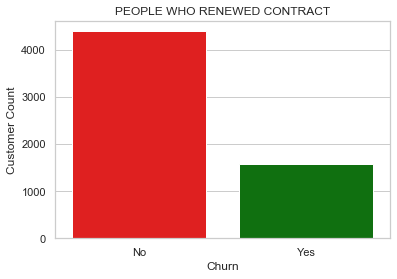


Umbalanced Target Class


In [658]:
#Target Variable
target_color = ['red','green']
sns.countplot(data=data, x='Churn',palette=target_color)
plt.title('PEOPLE WHO RENEWED CONTRACT')
plt.ylabel('Customer Count')
plt.show()

print()
print('Umbalanced Target Class')

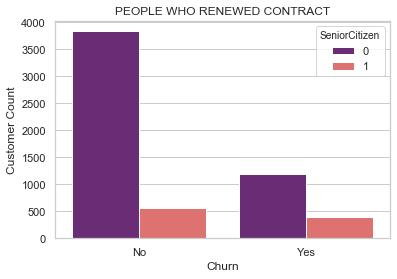

In [659]:
#Target Variable
sns.countplot(data=data, x='Churn',palette='magma',hue='SeniorCitizen')
plt.title('PEOPLE WHO RENEWED CONTRACT')
plt.ylabel('Customer Count')
plt.show()

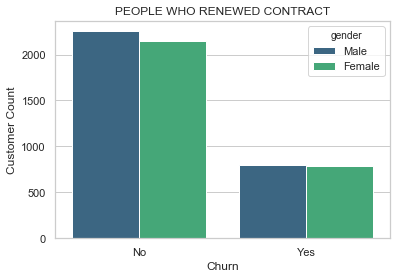

In [660]:
#Target Variable
sns.countplot(data=data, x='Churn',palette='viridis',hue='gender')
plt.title('PEOPLE WHO RENEWED CONTRACT')
plt.ylabel('Customer Count')
plt.show()

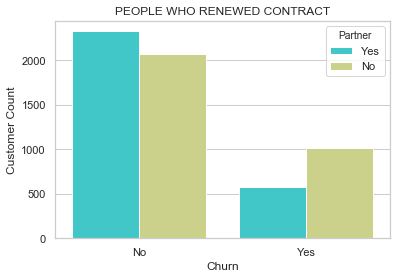

In [661]:
#Target Variable
sns.countplot(data=data, x='Churn',palette='rainbow',hue='Partner')
plt.title('PEOPLE WHO RENEWED CONTRACT')
plt.ylabel('Customer Count')
plt.show()

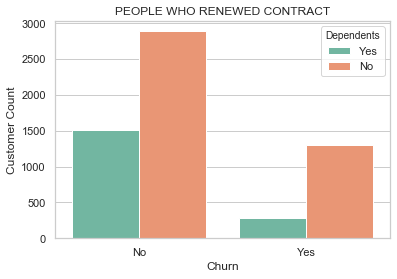

In [662]:
#Target Variable
sns.countplot(data=data, x='Churn',palette='Set2',hue='Dependents')
plt.title('PEOPLE WHO RENEWED CONTRACT')
plt.ylabel('Customer Count')
plt.show()

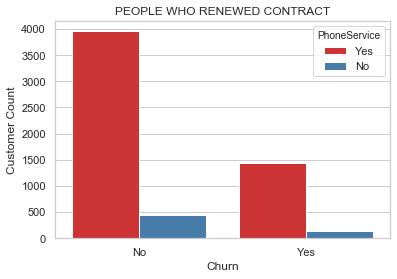

In [663]:
#Target Variable
sns.countplot(data=data, x='Churn',palette='Set1',hue='PhoneService')
plt.title('PEOPLE WHO RENEWED CONTRACT')
plt.ylabel('Customer Count')
plt.show()

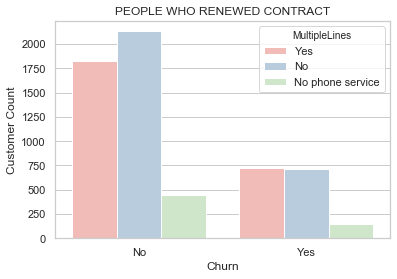

In [664]:
#Target Variable
sns.countplot(data=data, x='Churn',palette='Pastel1',hue='MultipleLines')
plt.title('PEOPLE WHO RENEWED CONTRACT')
plt.ylabel('Customer Count')
plt.show()

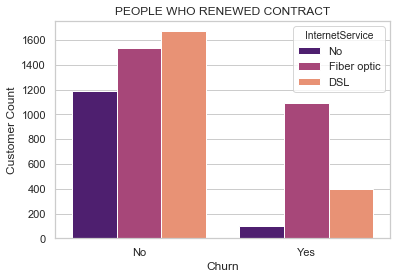

In [665]:
#Target Variable
sns.countplot(data=data, x='Churn',palette='magma',hue='InternetService')
plt.title('PEOPLE WHO RENEWED CONTRACT')
plt.ylabel('Customer Count')
plt.show()

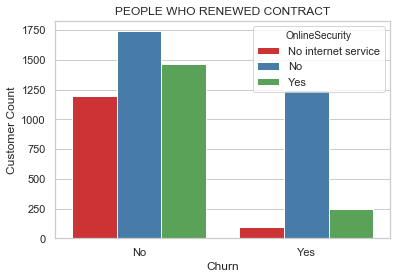

In [666]:
#Target Variable
sns.countplot(data=data, x='Churn',palette='Set1',hue='OnlineSecurity')
plt.title('PEOPLE WHO RENEWED CONTRACT')
plt.ylabel('Customer Count')
plt.show()

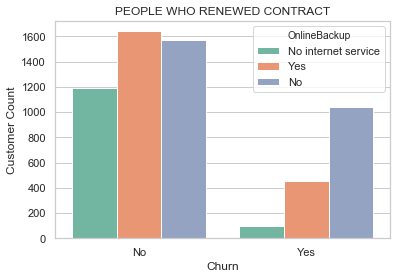

In [667]:
#Target Variable
sns.countplot(data=data, x='Churn',palette='Set2',hue='OnlineBackup')
plt.title('PEOPLE WHO RENEWED CONTRACT')
plt.ylabel('Customer Count')
plt.show()

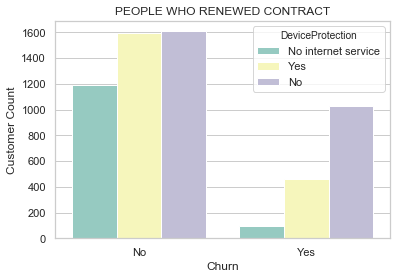

In [668]:
#Target Variable
sns.countplot(data=data, x='Churn',palette='Set3',hue='DeviceProtection')
plt.title('PEOPLE WHO RENEWED CONTRACT')
plt.ylabel('Customer Count')
plt.show()

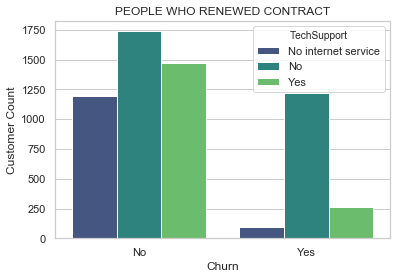

In [669]:
#Target Variable
sns.countplot(data=data, x='Churn',palette='viridis',hue='TechSupport')
plt.title('PEOPLE WHO RENEWED CONTRACT')
plt.ylabel('Customer Count')
plt.show()

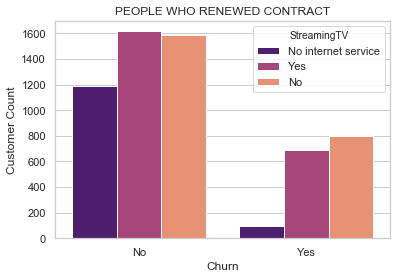

In [670]:
#Target Variable
sns.countplot(data=data, x='Churn',palette='magma',hue='StreamingTV')
plt.title('PEOPLE WHO RENEWED CONTRACT')
plt.ylabel('Customer Count')
plt.show()

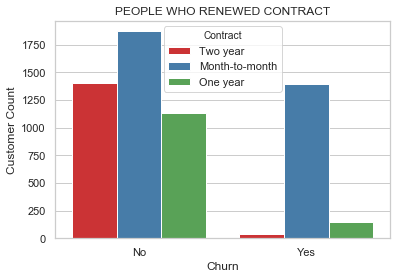

In [671]:
#Target Variable
sns.countplot(data=data, x='Churn',palette='Set1',hue='Contract')
plt.title('PEOPLE WHO RENEWED CONTRACT')
plt.ylabel('Customer Count')
plt.show()

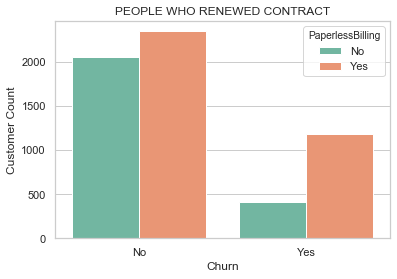

In [672]:
#Target Variable
sns.countplot(data=data, x='Churn',palette='Set2',hue='PaperlessBilling')
plt.title('PEOPLE WHO RENEWED CONTRACT')
plt.ylabel('Customer Count')
plt.show()

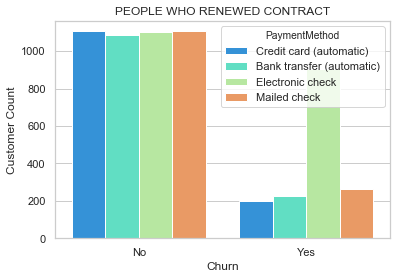

In [673]:
#Target Variable
sns.countplot(data=data, x='Churn',palette='rainbow',hue='PaymentMethod')
plt.title('PEOPLE WHO RENEWED CONTRACT')
plt.ylabel('Customer Count')
plt.show()

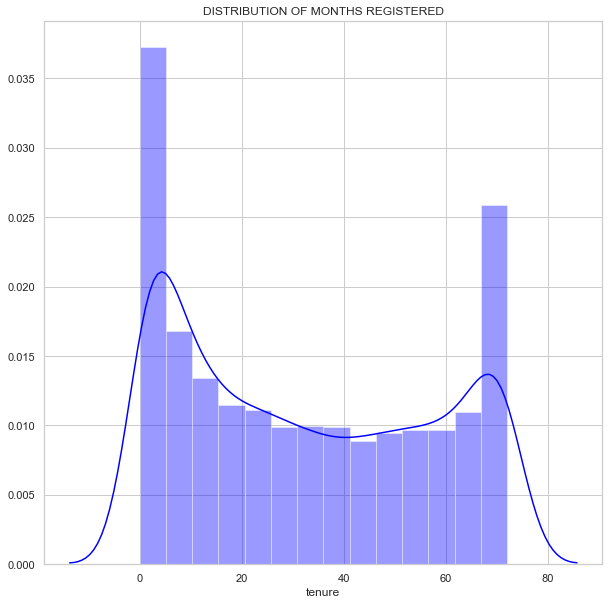

In [674]:
#Distribution of months 
plt.figure(figsize=(10,10))
sns.distplot(data['tenure'],color='blue')
plt.title('DISTRIBUTION OF MONTHS REGISTERED')
plt.show()

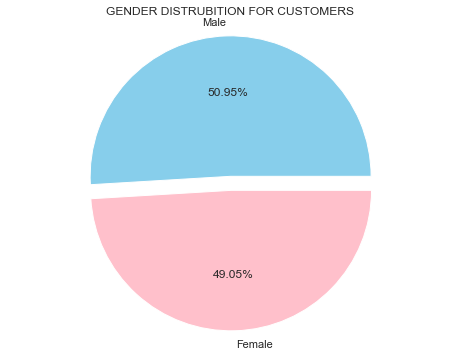

In [675]:
#Gender Count
gender = data['gender'].value_counts()
color = ['skyblue','pink']
plt.figure(figsize=(8,6))
plt.pie(gender,labels=gender.index,autopct='%1.2f%%',explode=(0,0.1),colors=color)
plt.title('GENDER DISTRUBITION FOR CUSTOMERS')
plt.axis('equal')
plt.show()

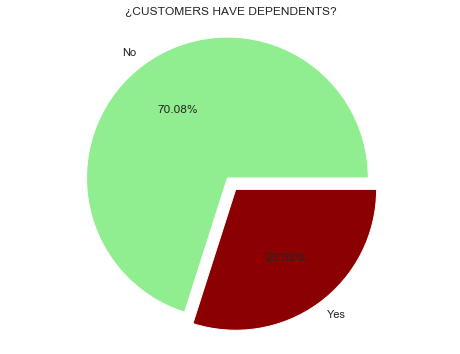

In [676]:
#Gender Count
dependents = data['Dependents'].value_counts()
color = ['lightgreen','darkred']
plt.figure(figsize=(8,6))
plt.pie(dependents,labels=dependents.index,autopct='%1.2f%%',explode=(0,0.1),colors=color)
plt.title('¿CUSTOMERS HAVE DEPENDENTS?')
plt.axis('equal')
plt.show()

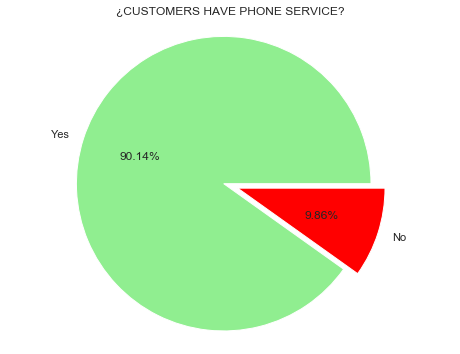

In [677]:
#phone Count
phone = data['PhoneService'].value_counts()
color = ['lightgreen','red']
plt.figure(figsize=(8,6))
plt.pie(phone,labels=phone.index,autopct='%1.2f%%',explode=(0,0.1),colors=color)
plt.title('¿CUSTOMERS HAVE PHONE SERVICE?')
plt.axis('equal')
plt.show()

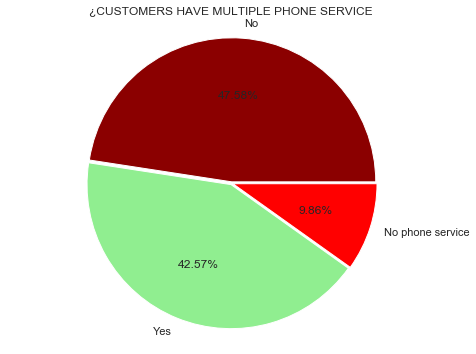

In [678]:
#phone Count
multi = data['MultipleLines'].value_counts()
color = ['darkred','lightgreen','red']
plt.figure(figsize=(8,6))
plt.pie(multi,labels=multi.index,autopct='%1.2f%%',explode=(0.01,0.01,0.01),colors=color)
plt.title('¿CUSTOMERS HAVE MULTIPLE PHONE SERVICE')
plt.axis('equal')
plt.show()

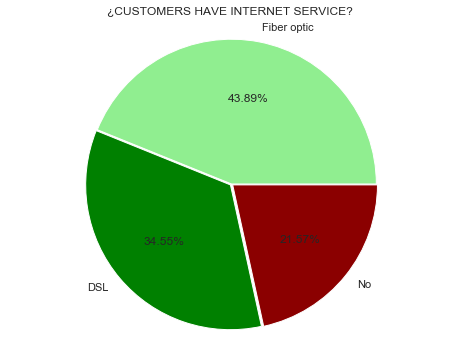

In [679]:
#internet Count
internet = data['InternetService'].value_counts()
color = ['lightgreen','green','darkred']
plt.figure(figsize=(8,6))
plt.pie(internet,labels=internet.index,autopct='%1.2f%%',explode=(0,0.01,0.01),colors=color)
plt.title('¿CUSTOMERS HAVE INTERNET SERVICE?')
plt.axis('equal')
plt.show()

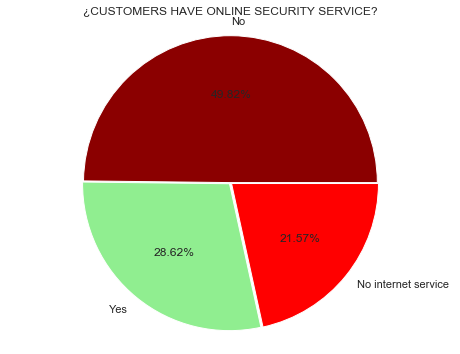

In [680]:
#osecurity Count
osecurity = data['OnlineSecurity'].value_counts()
color = ['darkred','lightgreen','red']
plt.figure(figsize=(8,6))
plt.pie(osecurity,labels=osecurity.index,autopct='%1.2f%%',explode=(0,0.01,0.01),colors=color)
plt.title('¿CUSTOMERS HAVE ONLINE SECURITY SERVICE?')
plt.axis('equal')
plt.show()

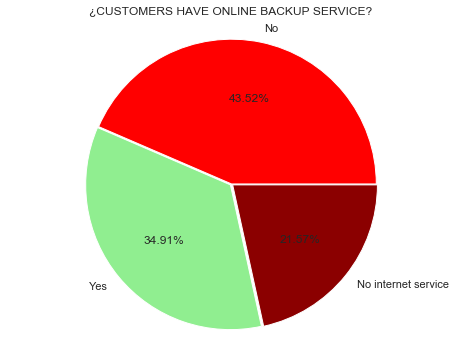

In [681]:
#onlinebackup Count
obackup = data['OnlineBackup'].value_counts()
color = ['red','lightgreen','darkred']
plt.figure(figsize=(8,6))
plt.pie(obackup,labels=obackup.index,autopct='%1.2f%%',explode=(0,0.01,0.01),colors=color)
plt.title('¿CUSTOMERS HAVE ONLINE BACKUP SERVICE?')
plt.axis('equal')
plt.show()

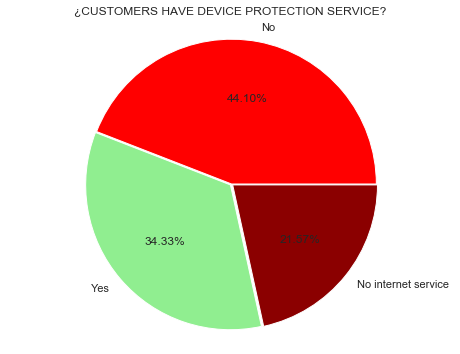

In [682]:
#deviceprotect Count
deviceprotect = data['DeviceProtection'].value_counts()
color = ['red','lightgreen','darkred']
plt.figure(figsize=(8,6))
plt.pie(deviceprotect,labels=deviceprotect.index,autopct='%1.2f%%',explode=(0,0.01,0.01),colors=color)
plt.title('¿CUSTOMERS HAVE DEVICE PROTECTION SERVICE?')
plt.axis('equal')
plt.show()

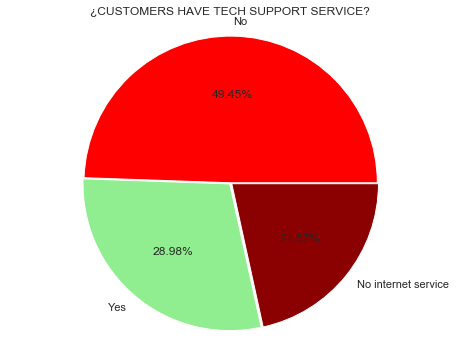

In [683]:
#TechSupport Count
techSupport = data['TechSupport'].value_counts()
color = ['red','lightgreen','darkred']
plt.figure(figsize=(8,6))
plt.pie(techSupport,labels=techSupport.index,autopct='%1.2f%%',explode=(0,0.01,0.01),colors=color)
plt.title('¿CUSTOMERS HAVE TECH SUPPORT SERVICE?')
plt.axis('equal')
plt.show()

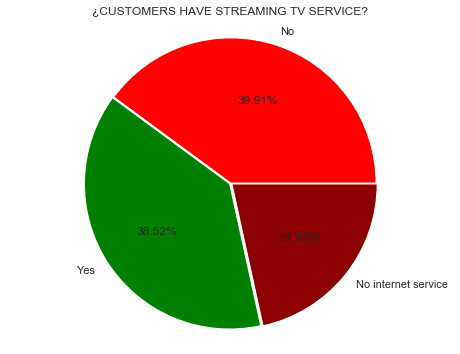

In [684]:
#StreamingTV Count
streamingTV = data['StreamingTV'].value_counts()
color = ['red','green','darkred']
plt.figure(figsize=(8,6))
plt.pie(streamingTV ,labels=streamingTV .index,autopct='%1.2f%%',explode=(0,0.01,0.01),colors=color)
plt.title('¿CUSTOMERS HAVE STREAMING TV SERVICE?')
plt.axis('equal')
plt.show()

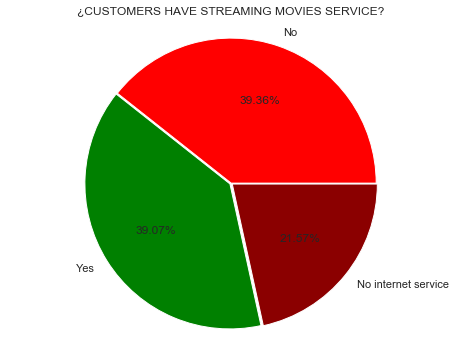

In [685]:
#StreamingMovies Count
streamingMovies = data['StreamingMovies'].value_counts()
color = ['red','green','darkred']
plt.figure(figsize=(8,6))
plt.pie(streamingMovies,labels=streamingMovies.index,autopct='%1.2f%%',explode=(0,0.01,0.01),colors=color)
plt.title('¿CUSTOMERS HAVE STREAMING MOVIES SERVICE?')
plt.axis('equal')
plt.show()

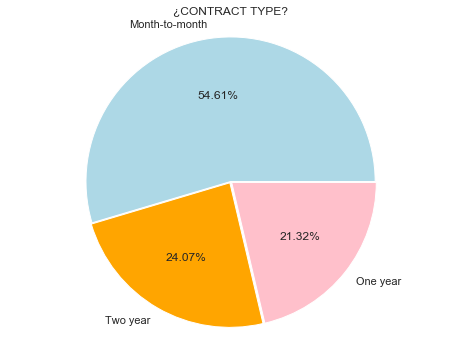

In [686]:
#Contract Count
contract = data['Contract'].value_counts()
color = ['lightblue','orange','pink']
plt.figure(figsize=(8,6))
plt.pie(contract,labels=contract.index,autopct='%1.2f%%',explode=(0,0.01,0.01),colors=color)
plt.title('¿CONTRACT TYPE?')
plt.axis('equal')
plt.show()

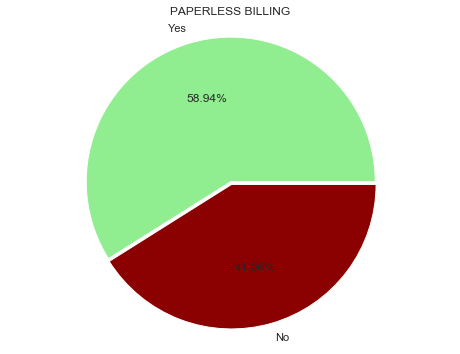

In [687]:
#PaperlessBilling Count
paperlessBilling = data['PaperlessBilling'].value_counts()
color = ['lightgreen','darkred']
plt.figure(figsize=(8,6))
plt.pie(paperlessBilling,labels=paperlessBilling.index,autopct='%1.2f%%',explode=(0.01,0.01),colors=color)
plt.title('PAPERLESS BILLING')
plt.axis('equal')
plt.show()

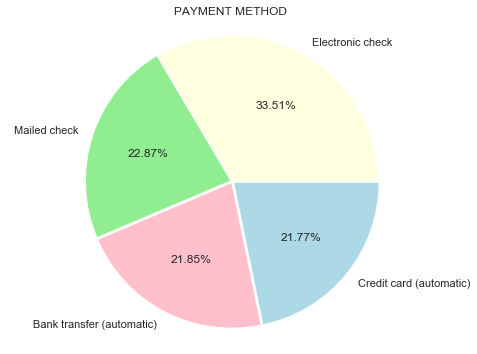

In [688]:
#PaymentMethod Count
paymentMethod = data['PaymentMethod'].value_counts()
color = ['lightyellow','lightgreen','pink','lightblue']
plt.figure(figsize=(8,6))
plt.pie(paymentMethod,labels=paymentMethod.index,autopct='%1.2f%%',explode=(0,0.01,0.01,0.01),colors=color)
plt.title('PAYMENT METHOD')
plt.axis('equal')
plt.show()

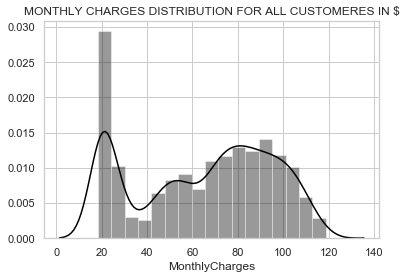

In [689]:
#distplot for all customers
sns.distplot(data['MonthlyCharges'],color='black')
plt.title('MONTHLY CHARGES DISTRIBUTION FOR ALL CUSTOMERES IN $')
plt.show()

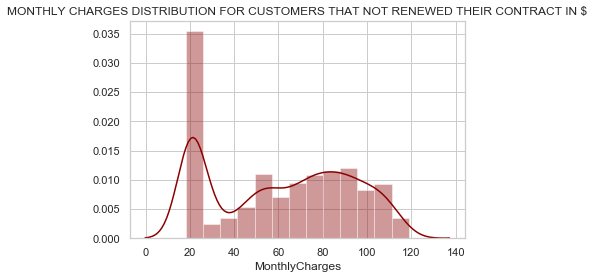

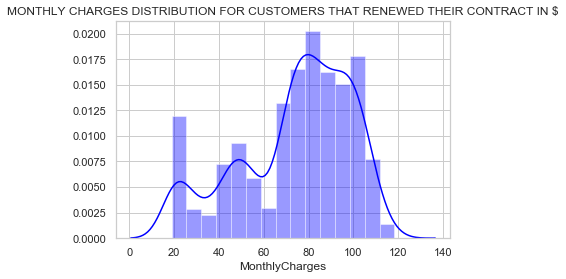

In [690]:
#Creating dataframe for customers who renew contract or no.
nochurn_month = data[data['Churn']=='No']
churn_month = data[data['Churn']!='No']

# Customeres not renewed
sns.distplot(nochurn_month['MonthlyCharges'],color='darkred')
plt.title('MONTHLY CHARGES DISTRIBUTION FOR CUSTOMERS THAT NOT RENEWED THEIR CONTRACT IN $')
plt.show()

#Customers that renewed
sns.distplot(churn_month['MonthlyCharges'],color='blue')
plt.title('MONTHLY CHARGES DISTRIBUTION FOR CUSTOMERS THAT RENEWED THEIR CONTRACT IN $')
plt.show()

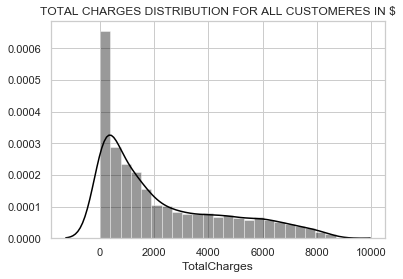

In [691]:
#distplot for all customers
sns.distplot(data['TotalCharges'],color='black')
plt.title('TOTAL CHARGES DISTRIBUTION FOR ALL CUSTOMERES IN $')
plt.show()

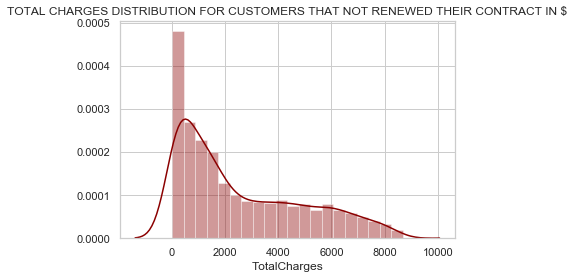

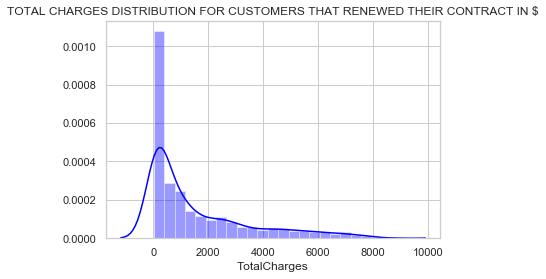

In [692]:
# Customeres not renewed
sns.distplot(nochurn_month['TotalCharges'],color='darkred')
plt.title('TOTAL CHARGES DISTRIBUTION FOR CUSTOMERS THAT NOT RENEWED THEIR CONTRACT IN $')
plt.show()

#Customers that renewed
sns.distplot(churn_month['TotalCharges'],color='blue')
plt.title('TOTAL CHARGES DISTRIBUTION FOR CUSTOMERS THAT RENEWED THEIR CONTRACT IN $')
plt.show()

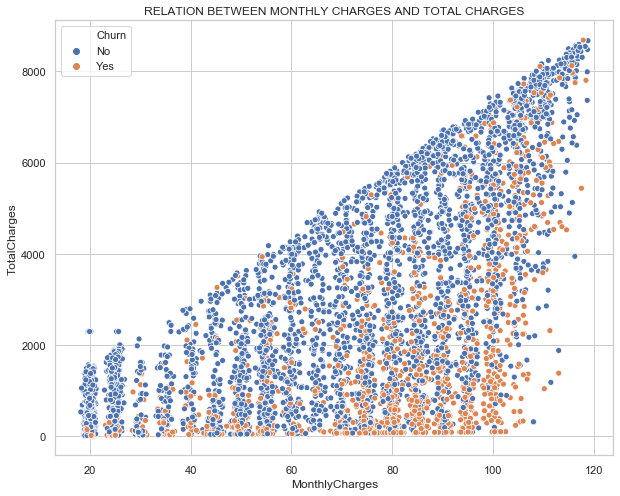

In [693]:
#relation between 
plt.figure(figsize=(10,8))
sns.scatterplot(data=data, x="MonthlyCharges", y="TotalCharges",hue='Churn')
plt.title('RELATION BETWEEN MONTHLY CHARGES AND TOTAL CHARGES')
plt.show()

#### **1.3 Data Preparation**

In [694]:
#Splitting Target Variable from dataframe
y = data['Churn']
X = data.drop(columns=['Churn'])

#Creating Dummy Variables for categorical data
X = pd.get_dummies(X)

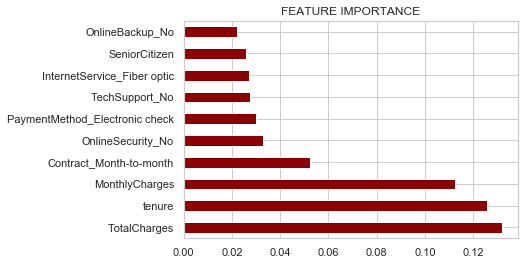

In [695]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh',color='darkred')
plt.title('FEATURE IMPORTANCE')
plt.show()

The variables that have more importance for a customer to decide if renew the service or not are: 
total charges, how many months the customer has been a customer, and monthly charges, if they can afford service or not.

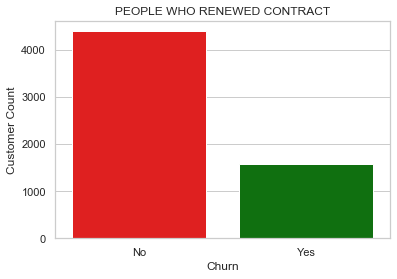

In [696]:
#Target Variable
target_color = ['red','green']
sns.countplot(data=data, x='Churn',palette=target_color)
plt.title('PEOPLE WHO RENEWED CONTRACT')
plt.ylabel('Customer Count')
plt.show()

Target class is imbalanced, so lets apply the Synthetic Minority Oversampling technique.

In [697]:
#Lets oversampe
smote = SMOTE(random_state = 0)
X_smote, y_smote = smote.fit_resample(X,y)
X_dev, y_dev = X_smote, y_smote

In [698]:
#Creating a Final test set, to test the model
X_smote = X_smote.iloc[881:]
y_smote = y_smote.iloc[881:]

#Selecting first 800 rows to final test set
X_dev = X_dev.iloc[0:880]
y_dev = y_dev.iloc[0:880]

In [716]:
#Checking shape
print('Input values', X_smote.shape)
print('Target value', y_smote.shape)

Input values (7917, 45)
Target value (7917,)


#### **1.4 MODELS**

In [700]:
#Creating ranfomforest
def telecom_randomForest(X_smote,y_smote):
    from sklearn.ensemble import RandomForestClassifier
    
    #Train and Test Split
    X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.30,random_state=0)
    
    #RANDOM FOREST MODEL
    random_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
    random_classifier.fit(X_train, y_train)
    random_prediction = random_classifier.predict(X_test)
    
    #Model Accuracy
    print('RANDOM FOREST CLASSIFIER FOR HR ANALYTICS - JOB CHANGE TRAIN DATAFRAME')
    print(confusion_matrix(y_test, random_prediction))
    print(classification_report(y_test, random_prediction))
    print('Model Accuracy: ',accuracy_score(y_test, random_prediction))
    
    #Save Model
    joblib.dump(random_classifier, 'telecom_random_forest.joblib')
    
    return random_classifier

In [701]:
#Calling random forest function
telecom_randomForest(X_smote,y_smote)

RANDOM FOREST CLASSIFIER FOR HR ANALYTICS - JOB CHANGE TRAIN DATAFRAME
[[ 975  127]
 [ 193 1081]]
              precision    recall  f1-score   support

          No       0.83      0.88      0.86      1102
         Yes       0.89      0.85      0.87      1274

    accuracy                           0.87      2376
   macro avg       0.86      0.87      0.87      2376
weighted avg       0.87      0.87      0.87      2376

Model Accuracy:  0.8653198653198653


RandomForestClassifier(n_estimators=200, random_state=0)

In [702]:
#Taking the Samme Model out of the function.
from sklearn.ensemble import RandomForestClassifier
    
#Train and Test Split
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.30,random_state=0)
    
#RANDOM FOREST MODEL
random_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
random_classifier.fit(X_train, y_train)
random_prediction = random_classifier.predict(X_test)
    
#Model Accuracy
print('RANDOM FOREST CLASSIFIER FOR HR ANALYTICS - JOB CHANGE TRAIN DATAFRAME')
print(confusion_matrix(y_test, random_prediction))
print(classification_report(y_test, random_prediction))
print('Model Accuracy: ',accuracy_score(y_test, random_prediction))

RANDOM FOREST CLASSIFIER FOR HR ANALYTICS - JOB CHANGE TRAIN DATAFRAME
[[ 975  127]
 [ 193 1081]]
              precision    recall  f1-score   support

          No       0.83      0.88      0.86      1102
         Yes       0.89      0.85      0.87      1274

    accuracy                           0.87      2376
   macro avg       0.86      0.87      0.87      2376
weighted avg       0.87      0.87      0.87      2376

Model Accuracy:  0.8653198653198653


#### **1.5 Final Test Set Check**

let's put our model to the test in the final test set.

In [703]:
#Predicting Target values for final test set
predictions = random_classifier.predict(X_dev)

#Converting into pandas object
predictions = pd.DataFrame(predictions)
predictions.columns = ['Predictions']


In [709]:
#Creating a Datafame for the actual values
actual_values = pd.DataFrame(y_dev)
actual_values.columns = ['ActualValues']

#Join dataframes
results = actual_values.join(predictions)
results

In [734]:
#Let´s compare the actual values with the predictions for the final test set
results.head(20)

,ActualValues,Predictions
0,No,No
1,No,No
2,Yes,Yes
3,No,No
4,No,No
5,No,No
6,No,No
7,No,Yes
8,No,No
9,No,No


Our model is very good in general. There are some mispredictions, but in general the predictions are very good. Let´s compare predictions with actual values, and create a third columns to see how many good and bad predictions we have.

In [726]:
#Lets comparte the values of the columns and see if the predictions were true of vales
predicted = results['ActualValues'].str.strip().str.lower() == results['Predictions'].str.strip().str.lower()

#Transform predicted into pandas DF
predicted = pd.DataFrame(predicted)
predicted.columns = ['True or False']

#Applying check function
predicted['True or False'] = predicted['True or False'].apply(checkFunc)

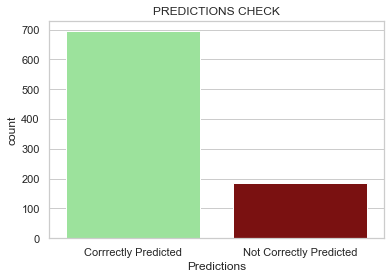

In [731]:
#Plot correct and incorrect results
predicted_color = ['lightgreen','darkred']
sns.countplot(data=predicted, x='True or False',palette=predicted_color)
plt.xlabel('Predictions')
plt.title('PREDICTIONS CHECK')
plt.show()

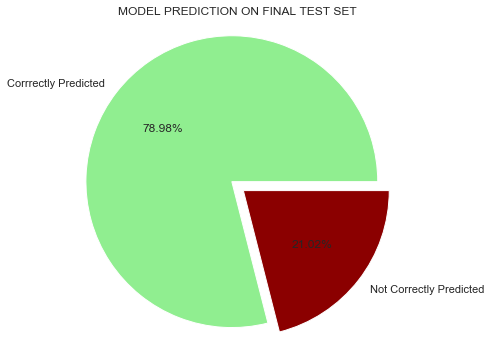

In [733]:
#predictions %
pred = predicted['True or False'].value_counts()
color = ['lightgreen','darkred']
plt.figure(figsize=(8,6))
plt.pie(pred,labels=pred.index,autopct='%1.2f%%',explode=(0,0.1),colors=color)
plt.title('MODEL PREDICTION ON FINAL TEST SET')
plt.axis('equal')
plt.show()

Our Model have predicted correctly 80% of the final test set, which is really good.
Our model took in consideration all the variables. Maybe it can be improved if we only choose the most important features, but currently works fine.